# Creando variable respuesta

Código para validar cruces y crear la variable respuesta

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas_profiling
import os
from datetime import datetime, timedelta
import dateutil.relativedelta
import gc

pd.set_option('display.max_columns',None)

Ventana escogida 4 meses.

## Activaciones

In [2]:
path_act='s3://adl-refined-dev-popular/data_orig/productos/activo-tarjeta-credito-nueva/productos_activos-tarjeta-credito-activadas_masterfile_H20180101-20200327.csv'

data_act = pd.read_csv(path_act, sep = '|', dtype={'ID_CLIENTE':str,'Numero_cuenta':str})
print(data_act.shape)
data_act

(40422, 6)


,Numero_cuenta,Numero_tarjeta,Identificacion,Tipo_identificacion,fecha_activacion,ID_CLIENTE
0,5392386030737574936,539238******7338,72376,2,29/01/2018,489152311997977401
1,4205594037122388692,420559******1701,72376,2,29/01/2018,489152311997977401
2,5391686024870915922,539168******9961,131658,2,29/10/2019,851557066763798702
3,4544054304149486544,454405******9846,131658,2,29/10/2019,851557066763798702
4,4205594035742557191,420559******1788,132796,2,27/09/2019,139052309749044702
...,...,...,...,...,...,...
40417,4544054306697232527,454405******2206,1234091635,1,23/08/2018,286055720866429601
40418,4066944507830597993,406694******0828,1234188867,1,18/01/2019,106155721625491802
40419,4506584008016663139,450658******3429,1234192603,1,19/03/2020,NaN
40420,4506584002386442927,450658******1032,1234641193,1,19/02/2020,NaN


In [3]:
data_act = data_act.drop_duplicates()

In [4]:
# Casting variables
data_act['fecha_activacion'] = pd.to_datetime(data_act['fecha_activacion'],format='%d/%m/%Y')
data_act['mes_activacion'] = pd.to_datetime(data_act['fecha_activacion'].dt.strftime('%Y-%m'),format='%Y-%m')

/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
data_act['ID_CLIENTE'].isnull().sum()/len(data_act)

0.07406399247729578

In [6]:
data_act = data_act[data_act['ID_CLIENTE'].notnull()]

In [7]:
data_act['mes_activacion'].value_counts().sort_index()

2018-01-01     774
2018-02-01     976
2018-03-01     869
2018-04-01    1129
2018-05-01    1237
2018-06-01    1176
2018-07-01    1159
2018-08-01    1226
2018-09-01    1333
2018-10-01    1317
2018-11-01    1175
2018-12-01    1192
2019-01-01    1273
2019-02-01    1528
2019-03-01    1652
2019-04-01    1747
2019-05-01    1774
2019-06-01    1543
2019-07-01    1819
2019-08-01    1619
2019-09-01    1923
2019-10-01    1960
2019-11-01    1063
2019-12-01    1613
2020-01-01    1284
2020-02-01    1647
2020-03-01    1410
Name: mes_activacion, dtype: int64

## Campañas 1

In [8]:
path_file='s3://adl-refined-dev-popular/campanas/tc-nuevas-proc-crm/campanas-tc-nuevas-proc-crm_H20190104-20190702.csv'

data = pd.read_csv(path_file, sep = '|', dtype={'ID_CLIENTE':str})
print(data.shape)
data.head()

(9193, 3)


,NUM_DOC,ID_CLIENTE,FECHA
0,79711820,248852317364653702,04/01/2019
1,20896135,724752296893347302,04/01/2019
2,41527303,733752313515338501,04/01/2019
3,79491343,148752314504163701,04/01/2019
4,39702994,746152314858805501,04/01/2019


In [9]:
data = data.drop_duplicates()

In [10]:
path_file1='s3://adl-refined-dev-popular/campanas/tc-nuevas-proc-crm/campanas-tc-nuevas-proc-crm_H20190801-20200201.csv'

data1 = pd.read_csv(path_file1, sep = '|', dtype={'ID_CLIENTE':str})
print(data1.shape)
data1.head()

(10670, 3)


,NUM_DOC,ID_CLIENTE,FECHA
0,21374060,687052296965327502,01/11/2019
1,54254979,996352303010557001,01/11/2019
2,17136481,758052296415581701,01/11/2019
3,8389506,584352312393754001,01/11/2019
4,41369835,708954239890969602,01/11/2019


In [11]:
data1 = data1.drop_duplicates()

In [12]:
data1 = pd.concat([data,data1], ignore_index=True)

del data

In [13]:
## tipo campaña
data1['TIPO CAMPAÑA'] = 'Preaprobados'
data1['tipo_camp'] = 'of-preaprobados'

In [14]:
# Casting variables
data1['FECHA'] = pd.to_datetime(data1['FECHA'],format='%d/%m/%Y')
data1['mes_campaña'] = pd.to_datetime(np.where(data1['FECHA'].dt.day>=28, 
                                                              data1['FECHA']+timedelta(days=10),
                                                              data1['FECHA']),format='%Y-%m-%d')
data1['mes_campaña2'] = pd.to_datetime(data1['FECHA'].dt.strftime('%Y-%m'),format='%Y-%m')
data1['mes_campaña'] = pd.to_datetime(data1['mes_campaña'].dt.strftime('%Y-%m'),format='%Y-%m')

In [15]:
data1.dtypes

NUM_DOC                  int64
ID_CLIENTE              object
FECHA           datetime64[ns]
TIPO CAMPAÑA            object
tipo_camp               object
mes_campaña     datetime64[ns]
mes_campaña2    datetime64[ns]
dtype: object

In [16]:
data1['mes_campaña2'].value_counts().sort_index()

2019-01-01     457
2019-02-01    1654
2019-04-01    3145
2019-05-01    2009
2019-06-01    1390
2019-07-01     538
2019-08-01    4255
2019-09-01    1623
2019-10-01     634
2019-11-01    1734
2019-12-01    1329
2020-01-01     131
2020-02-01     962
Name: mes_campaña2, dtype: int64

In [17]:
data1['mes_campaña'].value_counts().sort_index()

2019-01-01     457
2019-02-01    1654
2019-04-01    1659
2019-05-01    1755
2019-06-01    1740
2019-07-01    1928
2019-08-01    2043
2019-09-01    2212
2019-10-01    2257
2019-11-01    1734
2020-01-01    1329
2020-02-01     131
2020-03-01     962
Name: mes_campaña, dtype: int64

In [18]:
data1['FECHA'].value_counts().sort_index()

2019-01-04     213
2019-01-25     244
2019-02-21     370
2019-02-22      16
2019-02-26    1198
2019-02-27      70
2019-04-01    1659
2019-04-30    1486
2019-05-03     269
2019-05-31    1740
2019-06-28    1390
2019-07-02     538
2019-08-01    2002
2019-08-15      41
2019-08-30    2212
2019-09-30    1623
2019-10-17     634
2019-11-01    1657
2019-11-13      77
2019-12-30    1329
2020-01-31     131
2020-02-28     962
Name: FECHA, dtype: int64

In [19]:
data1

,NUM_DOC,ID_CLIENTE,FECHA,TIPO CAMPAÑA,tipo_camp,mes_campaña,mes_campaña2
0,79711820,248852317364653702,2019-01-04,Preaprobados,of-preaprobados,2019-01-01,2019-01-01
1,20896135,724752296893347302,2019-01-04,Preaprobados,of-preaprobados,2019-01-01,2019-01-01
2,41527303,733752313515338501,2019-01-04,Preaprobados,of-preaprobados,2019-01-01,2019-01-01
3,79491343,148752314504163701,2019-01-04,Preaprobados,of-preaprobados,2019-01-01,2019-01-01
4,39702994,746152314858805501,2019-01-04,Preaprobados,of-preaprobados,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...
19856,43649495,996352315681241301,2020-02-28,Preaprobados,of-preaprobados,2020-03-01,2020-02-01
19857,32397183,854552309888996701,2020-02-28,Preaprobados,of-preaprobados,2020-03-01,2020-02-01
19858,3288889,214752294598603801,2020-02-28,Preaprobados,of-preaprobados,2020-03-01,2020-02-01
19859,17053533,781455266519747501,2020-02-28,Preaprobados,of-preaprobados,2020-03-01,2020-02-01


In [20]:
path_file2='s3://adl-refined-dev-popular/campanas/tc-nuevas-proc-vend/campanas-tc-nuevas-proc-vendors_H20190101-20200301.csv'

data2 = pd.read_csv(path_file2, sep = '|', encoding='ISO8859-1',quoting=1, dtype={'ID_CLIENTE':str})
print(data2.shape)
data2.head()

(77743, 6)


,TIP_DOC,NUM_DOC,ID_CLIENTE,CUPO_APROBADO,FECHA,TIPO CAMPAÑA
0,1.0,64543703,779452303196638001,NaN,01/02/2019,Perfilados Activos
1,1.0,1013652262,767952313507880801,NaN,01/02/2019,Perfilados Activos
2,1.0,80188542,699952305504125601,NaN,01/02/2019,Perfilados Activos
3,1.0,1022989795,203652310816127502,NaN,01/02/2019,Perfilados Activos
4,1.0,79407899,379352315012448502,NaN,01/02/2019,Perfilados Activos


In [21]:
data2 = data2.drop_duplicates()

In [22]:
# Casting variables
data2['tipo_camp'] = np.where(data2['TIPO CAMPAÑA'] == 'Preaprobados','at-preaprobados','at-perfilados')
data2['FECHA'] = pd.to_datetime(data2['FECHA'],format='%d/%m/%Y')
data2['mes_campaña'] = pd.to_datetime(data2['FECHA'].dt.strftime('%Y-%m'),format='%Y-%m')


In [24]:
pd.crosstab(data2['FECHA'],data2['TIPO CAMPAÑA'])

TIPO CAMPAÑA,Perfilados Activos,Perfilados inactivos,Preaprobados
FECHA,,,
2019-02-01,1500,2439,777
2019-03-01,2000,1250,1751
2019-04-01,2000,1250,1753
2019-05-01,2001,1251,1752
2019-06-01,2000,1250,1756
2019-07-01,2001,172,1756
2019-08-01,2000,1250,1751
2019-09-01,2000,1250,1750
2019-10-01,2000,1250,1443


In [25]:
data2.shape[0]+data1.shape[0]

97316

In [26]:
data1.shape

(19861, 7)

# Cruces

## Solo por id

In [27]:
## Renombrando variables
data_act = data_act.rename(columns={'Identificacion':'cedula'})
data1 = data1.rename(columns={'NUM_DOC':'cedula'})
data2 = data2.rename(columns={'NUM_DOC':'cedula'})


In [28]:

def func_activa(base,date,n_mes,nom_col):
    if len(base)>0:
        date_fin = date + relativedelta(months=n_mes)

        data_act_temp = data_act.loc[(data_act['mes_activacion']>=date) & (data_act['mes_activacion']<=date_fin),['cedula','ID_CLIENTE','Numero_cuenta','fecha_activacion','mes_activacion']].drop_duplicates()
        ids_mes = data_act_temp['cedula'].unique()
        
        base.loc[base['cedula'].isin(ids_mes),'venta'] = 1    
        base.loc[base['cedula'].isnull(),'venta'] = 0
        
        base.loc[:,nom_col] = 1   
        base = pd.merge(base,data_act_temp,on=['cedula','ID_CLIENTE'],how='left')
    
    return base

In [29]:
data_act

,Numero_cuenta,Numero_tarjeta,cedula,Tipo_identificacion,fecha_activacion,ID_CLIENTE,mes_activacion
0,5392386030737574936,539238******7338,72376,2,2018-01-29,489152311997977401,2018-01-01
1,4205594037122388692,420559******1701,72376,2,2018-01-29,489152311997977401,2018-01-01
2,5391686024870915922,539168******9961,131658,2,2019-10-29,851557066763798702,2019-10-01
3,4544054304149486544,454405******9846,131658,2,2019-10-29,851557066763798702,2019-10-01
4,4205594035742557191,420559******1788,132796,2,2019-09-27,139052309749044702,2019-09-01
...,...,...,...,...,...,...,...
40412,5392386034541505136,539238******1828,1233502739,1,2018-01-05,377852309904346101,2018-01-01
40415,4544054305458405413,454405******9810,1233894838,1,2018-09-12,334455722326318001,2018-09-01
40416,4066944506949922589,406694******5709,1233908885,1,2018-12-28,737655716332452101,2018-12-01
40417,4544054306697232527,454405******2206,1234091635,1,2018-08-23,286055720866429601,2018-08-01


In [30]:
data1

,cedula,ID_CLIENTE,FECHA,TIPO CAMPAÑA,tipo_camp,mes_campaña,mes_campaña2
0,79711820,248852317364653702,2019-01-04,Preaprobados,of-preaprobados,2019-01-01,2019-01-01
1,20896135,724752296893347302,2019-01-04,Preaprobados,of-preaprobados,2019-01-01,2019-01-01
2,41527303,733752313515338501,2019-01-04,Preaprobados,of-preaprobados,2019-01-01,2019-01-01
3,79491343,148752314504163701,2019-01-04,Preaprobados,of-preaprobados,2019-01-01,2019-01-01
4,39702994,746152314858805501,2019-01-04,Preaprobados,of-preaprobados,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...
19856,43649495,996352315681241301,2020-02-28,Preaprobados,of-preaprobados,2020-03-01,2020-02-01
19857,32397183,854552309888996701,2020-02-28,Preaprobados,of-preaprobados,2020-03-01,2020-02-01
19858,3288889,214752294598603801,2020-02-28,Preaprobados,of-preaprobados,2020-03-01,2020-02-01
19859,17053533,781455266519747501,2020-02-28,Preaprobados,of-preaprobados,2020-03-01,2020-02-01


In [31]:
data2

,TIP_DOC,cedula,ID_CLIENTE,CUPO_APROBADO,FECHA,TIPO CAMPAÑA,tipo_camp,mes_campaña
0,1.0,64543703,779452303196638001,NaN,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01
1,1.0,1013652262,767952313507880801,NaN,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01
2,1.0,80188542,699952305504125601,NaN,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01
3,1.0,1022989795,203652310816127502,NaN,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01
4,1.0,79407899,379352315012448502,NaN,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01
...,...,...,...,...,...,...,...,...
77738,1.0,17007499,132452296355094801,19.600.000,2020-03-01,Preaprobados,at-preaprobados,2020-03-01
77739,1.0,17112493,246955266243335502,13.500.000,2020-03-01,Preaprobados,at-preaprobados,2020-03-01
77740,1.0,3362730,102652305802784101,9.000.000,2020-03-01,Preaprobados,at-preaprobados,2020-03-01
77741,1.0,3430980,339352294618484201,2.400.000,2020-03-01,Preaprobados,at-preaprobados,2020-03-01


In [32]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

str_dates = ['2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11',
          '2019-12','2020-01','2020-02','2020-03']

n_mes = 3 # numero de meses

for ix, date in enumerate(str_dates):
    print('Fecha:',date)
    date = pd.to_datetime(date,format='%Y-%m')
    nom_col = 'camp_'+date.strftime('%Y%m')
    
    base1 = data1[data1['mes_campaña']==date]
    base2 = data2[data2['mes_campaña']==date]
    #n_mes = n_mes-1
    if ix == 0:
        base_final1 = func_activa(base1,date,n_mes,nom_col)
        base_final2 = func_activa(base2,date,n_mes,nom_col)
    else:
        base_temp1 = func_activa(base1,date,n_mes,nom_col)
        base_temp2 = func_activa(base2,date,n_mes,nom_col)
        
        base_final1 = pd.concat([base_final1,base_temp1],ignore_index=True)
        base_final2 = pd.concat([base_final2,base_temp2],ignore_index=True)
        
        
    del base1, base2


Fecha: 2019-02
Fecha: 2019-03
Fecha: 2019-04
Fecha: 2019-05
Fecha: 2019-06


/home/jupyter/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyter/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort b

Fecha: 2019-07
Fecha: 2019-08
Fecha: 2019-09
Fecha: 2019-10
Fecha: 2019-11
Fecha: 2019-12
Fecha: 2020-01
Fecha: 2020-02
Fecha: 2020-03


In [33]:
cols_camp1 = ['camp_201902','camp_201904','camp_201905','camp_201906','camp_201907','camp_201908',
             'camp_201909','camp_201910','camp_201911','camp_202001','camp_202002','camp_202003']
cols_camp2 = ['camp_201902','camp_201903','camp_201904','camp_201905','camp_201906','camp_201907','camp_201908',
             'camp_201909','camp_201910','camp_201911','camp_201912','camp_202001','camp_202002','camp_202003'] 
    
base_final1[cols_camp1] =  base_final1[cols_camp1].fillna(0)
base_final1['num_camp'] =  base_final1[cols_camp1].sum(axis=1)

base_final2[cols_camp2] =  base_final2[cols_camp2].fillna(0)
base_final2['num_camp'] =  base_final2[cols_camp2].sum(axis=1)

In [34]:
base_final1 =  base_final1.drop_duplicates()
base_final2 =  base_final2.drop_duplicates()

In [35]:
base_final1

,FECHA,ID_CLIENTE,Numero_cuenta,TIPO CAMPAÑA,camp_201902,camp_201904,camp_201905,camp_201906,camp_201907,camp_201908,camp_201909,camp_201910,camp_201911,camp_202001,camp_202002,camp_202003,cedula,fecha_activacion,mes_activacion,mes_campaña,mes_campaña2,tipo_camp,venta,num_camp
0,2019-02-21,605152297523531501,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26547752,NaT,NaT,2019-02-01,2019-02-01,of-preaprobados,NaN,1.0
1,2019-02-21,309252297762338201,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28485549,NaT,NaT,2019-02-01,2019-02-01,of-preaprobados,NaN,1.0
2,2019-02-21,365655266241757701,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14165037,NaT,NaT,2019-02-01,2019-02-01,of-preaprobados,NaN,1.0
3,2019-02-21,227552315277170601,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1045505095,NaT,NaT,2019-02-01,2019-02-01,of-preaprobados,NaN,1.0
4,2019-02-21,833752296410065002,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17125223,NaT,NaT,2019-02-01,2019-02-01,of-preaprobados,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19922,2020-02-28,996352315681241301,NaN,Preaprobados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,43649495,NaT,NaT,2020-03-01,2020-02-01,of-preaprobados,NaN,1.0
19923,2020-02-28,854552309888996701,NaN,Preaprobados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32397183,NaT,NaT,2020-03-01,2020-02-01,of-preaprobados,NaN,1.0
19924,2020-02-28,214752294598603801,NaN,Preaprobados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3288889,NaT,NaT,2020-03-01,2020-02-01,of-preaprobados,NaN,1.0
19925,2020-02-28,781455266519747501,NaN,Preaprobados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17053533,NaT,NaT,2020-03-01,2020-02-01,of-preaprobados,NaN,1.0


In [36]:
base_final1['num_camp'].value_counts()

1.0    19927
Name: num_camp, dtype: int64

In [37]:
base_final1.groupby('cedula')['num_camp'].sum().value_counts()

1.0    14944
2.0     2289
3.0      127
4.0        6
Name: num_camp, dtype: int64

In [38]:
base_final2.groupby('cedula')['num_camp'].sum().sort_values()

cedula
3709        1.0
43802101    1.0
43802515    1.0
43803994    1.0
43805653    1.0
           ... 
37225958    4.0
20297043    4.0
19055563    5.0
3608998     6.0
193357      6.0
Name: num_camp, Length: 66171, dtype: float64

In [39]:
base_final2[base_final2['cedula']==20297043]

,CUPO_APROBADO,FECHA,ID_CLIENTE,Numero_cuenta,TIPO CAMPAÑA,TIP_DOC,camp_201902,camp_201903,camp_201904,camp_201905,camp_201906,camp_201907,camp_201908,camp_201909,camp_201910,camp_201911,camp_201912,camp_202001,camp_202002,camp_202003,cedula,fecha_activacion,mes_activacion,mes_campaña,tipo_camp,venta,num_camp
23423,NaN,2019-06-01,576752296819028301,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20297043,NaT,NaT,2019-06-01,at-preaprobados,NaN,1.0
42684,10.000.000,2019-10-01,576752296819028301,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20297043,NaT,NaT,2019-10-01,at-preaprobados,NaN,1.0
65444,10.000.000,2020-02-01,576752296819028301,4205594031913382378,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20297043,2020-03-16,2020-03-01,2020-02-01,at-preaprobados,1.0,1.0
65445,10.000.000,2020-02-01,576752296819028301,5392386036362694972,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20297043,2020-03-16,2020-03-01,2020-02-01,at-preaprobados,1.0,1.0


In [40]:
data_act[data_act['cedula']==20297043]

,Numero_cuenta,Numero_tarjeta,cedula,Tipo_identificacion,fecha_activacion,ID_CLIENTE,mes_activacion
13804,4205594031913382378,420559******2939,20297043,1,2020-03-16,576752296819028301,2020-03-01
13805,5392386036362694972,539238******0779,20297043,1,2020-03-16,576752296819028301,2020-03-01


In [41]:
data2[data2['cedula']==20297043]

,TIP_DOC,cedula,ID_CLIENTE,CUPO_APROBADO,FECHA,TIPO CAMPAÑA,tipo_camp,mes_campaña
48095,1.0,20297043,576752296819028301,NaN,2019-06-01,Preaprobados,at-preaprobados,2019-06-01
55292,1.0,20297043,576752296819028301,10.000.000,2019-10-01,Preaprobados,at-preaprobados,2019-10-01
67341,1.0,20297043,576752296819028301,10.000.000,2020-02-01,Preaprobados,at-preaprobados,2020-02-01


In [42]:
print(base_final1.shape)
print(base_final2.shape)
base_final2

(19927, 24)
(78143, 27)


,CUPO_APROBADO,FECHA,ID_CLIENTE,Numero_cuenta,TIPO CAMPAÑA,TIP_DOC,camp_201902,camp_201903,camp_201904,camp_201905,camp_201906,camp_201907,camp_201908,camp_201909,camp_201910,camp_201911,camp_201912,camp_202001,camp_202002,camp_202003,cedula,fecha_activacion,mes_activacion,mes_campaña,tipo_camp,venta,num_camp
0,NaN,2019-02-01,779452303196638001,NaN,Perfilados Activos,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64543703,NaT,NaT,2019-02-01,at-perfilados,NaN,1.0
1,NaN,2019-02-01,767952313507880801,NaN,Perfilados Activos,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1013652262,NaT,NaT,2019-02-01,at-perfilados,NaN,1.0
2,NaN,2019-02-01,699952305504125601,NaN,Perfilados Activos,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80188542,NaT,NaT,2019-02-01,at-perfilados,NaN,1.0
3,NaN,2019-02-01,203652310816127502,NaN,Perfilados Activos,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1022989795,NaT,NaT,2019-02-01,at-perfilados,NaN,1.0
4,NaN,2019-02-01,379352315012448502,NaN,Perfilados Activos,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79407899,NaT,NaT,2019-02-01,at-perfilados,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78138,19.600.000,2020-03-01,132452296355094801,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17007499,NaT,NaT,2020-03-01,at-preaprobados,NaN,1.0
78139,13.500.000,2020-03-01,246955266243335502,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17112493,NaT,NaT,2020-03-01,at-preaprobados,NaN,1.0
78140,9.000.000,2020-03-01,102652305802784101,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3362730,NaT,NaT,2020-03-01,at-preaprobados,NaN,1.0
78141,2.400.000,2020-03-01,339352294618484201,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3430980,NaT,NaT,2020-03-01,at-preaprobados,NaN,1.0


In [43]:
base_final1

,FECHA,ID_CLIENTE,Numero_cuenta,TIPO CAMPAÑA,camp_201902,camp_201904,camp_201905,camp_201906,camp_201907,camp_201908,camp_201909,camp_201910,camp_201911,camp_202001,camp_202002,camp_202003,cedula,fecha_activacion,mes_activacion,mes_campaña,mes_campaña2,tipo_camp,venta,num_camp
0,2019-02-21,605152297523531501,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26547752,NaT,NaT,2019-02-01,2019-02-01,of-preaprobados,NaN,1.0
1,2019-02-21,309252297762338201,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28485549,NaT,NaT,2019-02-01,2019-02-01,of-preaprobados,NaN,1.0
2,2019-02-21,365655266241757701,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14165037,NaT,NaT,2019-02-01,2019-02-01,of-preaprobados,NaN,1.0
3,2019-02-21,227552315277170601,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1045505095,NaT,NaT,2019-02-01,2019-02-01,of-preaprobados,NaN,1.0
4,2019-02-21,833752296410065002,NaN,Preaprobados,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17125223,NaT,NaT,2019-02-01,2019-02-01,of-preaprobados,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19922,2020-02-28,996352315681241301,NaN,Preaprobados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,43649495,NaT,NaT,2020-03-01,2020-02-01,of-preaprobados,NaN,1.0
19923,2020-02-28,854552309888996701,NaN,Preaprobados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32397183,NaT,NaT,2020-03-01,2020-02-01,of-preaprobados,NaN,1.0
19924,2020-02-28,214752294598603801,NaN,Preaprobados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3288889,NaT,NaT,2020-03-01,2020-02-01,of-preaprobados,NaN,1.0
19925,2020-02-28,781455266519747501,NaN,Preaprobados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17053533,NaT,NaT,2020-03-01,2020-02-01,of-preaprobados,NaN,1.0


In [44]:
base_final1['venta'].value_counts()

1.0    2374
Name: venta, dtype: int64

In [45]:
base_final2['venta'].value_counts()

1.0    2645
Name: venta, dtype: int64

In [46]:
base_final2.groupby(['TIPO CAMPAÑA'])['venta'].sum()

TIPO CAMPAÑA
Perfilados Activos        98.0
Perfilados inactivos      20.0
Preaprobados            2527.0
Name: venta, dtype: float64

In [47]:
base_final1.groupby(['mes_campaña','TIPO CAMPAÑA'])['venta'].sum()

mes_campaña  TIPO CAMPAÑA
2019-02-01   Preaprobados    266.0
2019-04-01   Preaprobados    258.0
2019-05-01   Preaprobados    376.0
2019-06-01   Preaprobados    250.0
2019-07-01   Preaprobados    195.0
2019-08-01   Preaprobados    236.0
2019-09-01   Preaprobados    192.0
2019-10-01   Preaprobados    241.0
2019-11-01   Preaprobados    186.0
2020-01-01   Preaprobados    141.0
2020-02-01   Preaprobados     10.0
2020-03-01   Preaprobados     23.0
Name: venta, dtype: float64

In [48]:
base_final2.groupby(['mes_campaña','TIPO CAMPAÑA'])['venta'].sum()

mes_campaña  TIPO CAMPAÑA        
2019-02-01   Perfilados Activos        8.0
             Perfilados inactivos      2.0
             Preaprobados             98.0
2019-03-01   Perfilados Activos       15.0
             Perfilados inactivos      2.0
             Preaprobados            243.0
2019-04-01   Perfilados Activos       16.0
             Perfilados inactivos      0.0
             Preaprobados            157.0
2019-05-01   Perfilados Activos       10.0
             Perfilados inactivos      2.0
             Preaprobados            132.0
2019-06-01   Perfilados Activos        3.0
             Perfilados inactivos      0.0
             Preaprobados             81.0
2019-07-01   Perfilados Activos        9.0
             Perfilados inactivos      1.0
             Preaprobados             87.0
2019-08-01   Perfilados Activos        8.0
             Perfilados inactivos      4.0
             Preaprobados            127.0
2019-09-01   Perfilados Activos        9.0
             Perfila

In [49]:
base_final1.shape[0]+base_final2.shape[0]

98070

In [50]:
fin_cols = ['cedula','Numero_cuenta','ID_CLIENTE','FECHA','TIPO CAMPAÑA','tipo_camp','mes_campaña','fecha_activacion','mes_activacion','venta']
base_final = pd.concat([base_final1[fin_cols],base_final2[fin_cols]],ignore_index=True).sort_values('mes_campaña')
base_final = base_final[base_final['ID_CLIENTE'].notnull()]
print(base_final.shape)
base_final

(90226, 10)


,cedula,Numero_cuenta,ID_CLIENTE,FECHA,TIPO CAMPAÑA,tipo_camp,mes_campaña,fecha_activacion,mes_activacion,venta
0,26547752,NaN,605152297523531501,2019-02-21,Preaprobados,of-preaprobados,2019-02-01,NaT,NaT,NaN
21513,79433979,NaN,517052288594800301,2019-02-01,Perfilados inactivos,at-perfilados,2019-02-01,NaT,NaT,NaN
21514,41482383,NaN,299552288832229601,2019-02-01,Perfilados inactivos,at-perfilados,2019-02-01,NaT,NaT,NaN
21518,80503391,NaN,433252288601044302,2019-02-01,Perfilados inactivos,at-perfilados,2019-02-01,NaT,NaT,NaN
21506,79495230,NaN,494052288606497002,2019-02-01,Perfilados inactivos,at-perfilados,2019-02-01,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
91269,52237496,NaN,285552310380344002,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,NaT,NaT,NaN
91270,41325475,NaN,132452307871086101,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,NaT,NaT,NaN
91271,53094710,NaN,474052317867675002,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,NaT,NaT,NaN
91264,41379071,NaN,591452305944459602,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,NaT,NaT,NaN


In [51]:
base_count1 = base_final1.groupby(['cedula','tipo_camp','TIPO CAMPAÑA','mes_campaña'])['venta'].max().reset_index()
base_count2 = base_final2.groupby(['cedula','tipo_camp','TIPO CAMPAÑA','mes_campaña'])['venta'].max().reset_index()

base_count = base_final.groupby(['cedula','tipo_camp','TIPO CAMPAÑA','mes_campaña'])['venta'].max().reset_index()
base_count

,cedula,tipo_camp,TIPO CAMPAÑA,mes_campaña,venta
0,3709,at-perfilados,Perfilados Activos,2019-12-01,NaN
1,3876,at-perfilados,Perfilados Activos,2019-11-01,NaN
2,4444,at-perfilados,Perfilados Activos,2019-05-01,NaN
3,8205,at-perfilados,Perfilados Activos,2019-06-01,NaN
4,15237,at-perfilados,Perfilados Activos,2019-06-01,NaN
...,...,...,...,...,...
88955,1233908437,at-perfilados,Perfilados Activos,2019-11-01,NaN
88956,1234090132,at-perfilados,Perfilados Activos,2019-12-01,NaN
88957,1234639300,at-perfilados,Perfilados Activos,2019-12-01,NaN
88958,1235242620,at-perfilados,Perfilados Activos,2019-12-01,NaN


In [52]:
base_count.groupby(['mes_campaña','TIPO CAMPAÑA'])['venta'].sum()

mes_campaña  TIPO CAMPAÑA        
2019-02-01   Perfilados Activos        5.0
             Perfilados inactivos      1.0
             Preaprobados            243.0
2019-03-01   Perfilados Activos       12.0
             Perfilados inactivos      1.0
             Preaprobados            155.0
2019-04-01   Perfilados Activos       10.0
             Perfilados inactivos      0.0
             Preaprobados            344.0
2019-05-01   Perfilados Activos        7.0
             Perfilados inactivos      1.0
             Preaprobados            425.0
2019-06-01   Perfilados Activos        2.0
             Perfilados inactivos      0.0
             Preaprobados            258.0
2019-07-01   Perfilados Activos        6.0
             Perfilados inactivos      1.0
             Preaprobados            214.0
2019-08-01   Perfilados Activos        5.0
             Perfilados inactivos      3.0
             Preaprobados            272.0
2019-09-01   Perfilados Activos        6.0
             Perfila

Text(0, 0.5, 'Mes de campaña')

/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


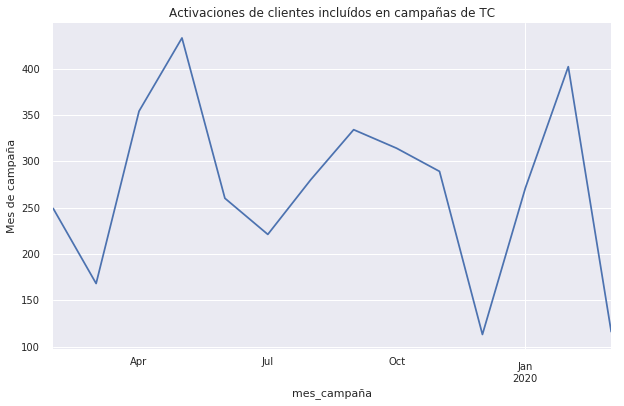

In [53]:
plt.figure(figsize=(10, 6))
base_count.groupby('mes_campaña')['venta'].sum().plot()
plt.title('Activaciones de clientes incluídos en campañas de TC')
plt.ylabel('Número de Activaciones')
plt.ylabel('Mes de campaña')

In [54]:
actv_base1 = base_count1[base_count1['venta']==1]
tabla = pd.crosstab(actv_base1['cedula'],actv_base1['TIPO CAMPAÑA'])
tabla['total'] = tabla.sum(axis=1)
tabla.sort_values('total')

TIPO CAMPAÑA,Preaprobados,total
cedula,,
189886,1,1
31262580,1,1
31257163,1,1
31256618,1,1
31250961,1,1
...,...,...
13922148,1,1
13920267,1,1
13920178,1,1


In [55]:
pd.crosstab(base_count1['mes_campaña'],base_count1['tipo_camp'])

tipo_camp,of-preaprobados
mes_campaña,
2019-02-01,1654
2019-04-01,1659
2019-05-01,1755
2019-06-01,1740
2019-07-01,1928
2019-08-01,2002
2019-09-01,2212
2019-10-01,2257
2019-11-01,1734


In [56]:
pd.crosstab(actv_base1['mes_campaña'],actv_base1['tipo_camp'])

tipo_camp,of-preaprobados
mes_campaña,
2019-02-01,179
2019-04-01,216
2019-05-01,312
2019-06-01,200
2019-07-01,148
2019-08-01,176
2019-09-01,156
2019-10-01,194
2019-11-01,138


In [57]:
actv_base2 = base_count2[base_count2['venta']==1]
tabla = pd.crosstab(actv_base2['cedula'],actv_base2['TIPO CAMPAÑA'])
tabla['total'] = tabla.sum(axis=1)
tabla.sort_values('total')

TIPO CAMPAÑA,Perfilados Activos,Perfilados inactivos,Preaprobados,total
cedula,,,,
179267,0,0,1,1
34658815,0,0,1,1
34565645,0,0,1,1
34554257,0,0,1,1
34528286,0,0,1,1
...,...,...,...,...
17109892,0,0,1,1
17109404,0,0,1,1
17119130,0,0,1,1


In [58]:
pd.crosstab(base_count2['mes_campaña'],base_count2['tipo_camp'])

tipo_camp,at-perfilados,at-preaprobados
mes_campaña,,
2019-02-01,3939,777
2019-03-01,3250,1750
2019-04-01,3250,1753
2019-05-01,3250,1750
2019-06-01,3250,1756
2019-07-01,2172,1756
2019-08-01,3250,1750
2019-09-01,3250,1750
2019-10-01,3250,1443


In [59]:
pd.crosstab(actv_base2['mes_campaña'],actv_base2['tipo_camp'])

tipo_camp,at-perfilados,at-preaprobados
mes_campaña,,
2019-02-01,6,64
2019-03-01,13,155
2019-04-01,10,128
2019-05-01,8,113
2019-06-01,2,58
2019-07-01,7,66
2019-08-01,8,96
2019-09-01,8,170
2019-10-01,3,117


## Guardando bases

In [60]:
path_tx_fn = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/camp_actv_tot'
path_tx_fn1 = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/camp_actv_oficina'
path_tx_fn2 = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/camp_actv_atento'

base_final.to_parquet(path_tx_fn, engine = 'pyarrow', index = False)
base_final1.to_parquet(path_tx_fn1, engine = 'pyarrow', index = False)
base_final2.to_parquet(path_tx_fn2, engine = 'pyarrow', index = False)

# Creación Primer uso

In [2]:
str_dates = ['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
           '201901','201902','201903','201904','201905','201906','201907','201909','201910','201911','201912']

path_tx = 's3://adl-refined-dev-popular/data_orig/transacciones/tarjeta-credito/transacciones_tarjeta-credito_repgesco-masterfile_M'


In [3]:

for ix, date in enumerate(str_dates): 
    
    print('Archivo:',date)
    path = path_tx + date + '.csv'
    
    data_temp = pd.read_csv(path, sep = '|', dtype={'CONT_ID':str,'COD_TRX':str,'TIPO_ID_HOMOL':str,'NRO_CUENTA':str,
                                                   'CODIGO_SERVICIO':str}, encoding='latin-1')
    data_temp.rename(columns={'CONT_ID':'ID_CLIENTE'}, inplace=True)
    data_temp.columns = data_temp.columns.str.lower()
    
    if ix == 0:
        data_tx = data_temp
    else:
        data_tx = pd.concat([data_tx,data_temp],ignore_index=True)
    
    del data_temp
    gc.collect()
    

Archivo: 201801


/home/jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,3,7,10,17,18,20,21,23,24,26,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Archivo: 201802
Archivo: 201803
Archivo: 201804
Archivo: 201805
Archivo: 201806
Archivo: 201807
Archivo: 201808
Archivo: 201809


/home/jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,3,7,17,18,21,23,24,26,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Archivo: 201810
Archivo: 201811
Archivo: 201812
Archivo: 201901
Archivo: 201902


/home/jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,17,18,21,23,24,26,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Archivo: 201903
Archivo: 201904


/home/jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,17,18,21,23,24,26,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Archivo: 201905
Archivo: 201906
Archivo: 201907
Archivo: 201909


/home/jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Archivo: 201910


/home/jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16,17,20,22,23,24,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


Archivo: 201911


/home/jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16,17,20,22,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Archivo: 201912


In [4]:

## Corrigiendo registros corridos
data_tx.loc[data_tx['fuente'] == '04/2019','referen_universal'] = data_tx.loc[data_tx['fuente'] == '04/2019','cuotas']
data_tx.loc[data_tx['fuente'] == '04/2019','fecha_periodo'] = '04/2019'
data_tx.loc[data_tx['fuente'] == '04/2019','cuotas'] = 36
data_tx.loc[data_tx['fuente'] == '04/2019','fuente'] = 'MASTERFILE'

data_tx.loc[data_tx['fuente'] == '10/2019','referen_universal'] = data_tx.loc[data_tx['fuente'] == '10/2019','cuotas']
data_tx.loc[data_tx['fuente'] == '10/2019','fecha_periodo'] = '10/2019'
data_tx.loc[data_tx['fuente'] == '10/2019','cuotas'] = 36
data_tx.loc[data_tx['fuente'] == '10/2019','fuente'] = 'MASTERFILE'


In [6]:
data_tx = data_tx.drop(index=data_tx[data_tx['fecha_periodo'].str.contains('/') == False].index)

In [7]:
data_tx['fecha_periodo'] = pd.to_datetime(data_tx['fecha_periodo'], format = '%m/%Y')
data_tx['fecha_transaccion'] = pd.to_datetime(data_tx['fecha_transaccion'], format = '%d/%m/%Y')
data_tx['mes_transaccion'] = pd.to_datetime(data_tx['fecha_transaccion'].dt.strftime('%Y-%m'), format = '%Y-%m')

In [8]:
data_tx.dtypes

bin                               object
ciudad_comercio                   object
cod_autoriza                      object
cod_estable                       object
cod_moneda_origen                 object
cod_unico_trx                     object
codigo_servicio                   object
cuotas                            object
descripcion_trx                   object
estado_comercio                   object
fecha_comprobante                 object
fecha_periodo             datetime64[ns]
fecha_proceso                     object
fecha_transaccion         datetime64[ns]
fecha_trx_int                     object
fuente                            object
hora_transaccion                  object
id_cliente                        object
identificacion_cliente            object
mcc                              float64
modulo_logico                     object
nombre_comercio                   object
nro_cuenta                        object
numero_tarjeta                    object
referen_universa

In [9]:
pd.crosstab(data_tx['mes_transaccion'],data_tx['fuente'])

fuente,MASTERFILE,REPGESCODES
mes_transaccion,,
2018-01-01,73031,152742
2018-02-01,68578,146678
2018-03-01,77510,173267
2018-04-01,78670,176321
2018-05-01,82304,191721
2018-06-01,79498,190248
2018-07-01,79650,192418
2018-08-01,85589,200805
2018-09-01,86945,202306


In [10]:
data_tx.groupby('fecha_periodo').size().sort_index()

fecha_periodo
2018-01-01      71047
2018-02-01      68175
2018-03-01      72012
2018-04-01      84167
2018-05-01      82575
2018-06-01      76265
2018-07-01      82670
2018-08-01      83507
2018-09-01      82099
2018-10-01    1915766
2018-11-01     330740
2018-12-01     320379
2019-01-01     306567
2019-02-01     256066
2019-03-01     293054
2019-04-01     296592
2019-05-01     327437
2019-06-01     299791
2019-07-01     312732
2019-08-01       9992
2019-09-01     212301
2019-10-01    4464034
2019-11-01    2982733
2019-12-01    4477899
2020-01-01          4
2020-02-01          7
2020-04-01          2
dtype: int64

In [11]:
data_tx[data_tx['fecha_periodo']=='2018-10-01'].groupby('mes_transaccion').size().sort_index()

mes_transaccion
2018-01-01    152742
2018-02-01    146678
2018-03-01    173267
2018-04-01    176321
2018-05-01    191723
2018-06-01    190256
2018-07-01    192434
2018-08-01    200832
2018-09-01    211413
2018-10-01    280100
dtype: int64

In [12]:
data_tx.groupby('mes_transaccion').size()

mes_transaccion
2018-01-01    225773
2018-02-01    215256
2018-03-01    250777
2018-04-01    254991
2018-05-01    274025
2018-06-01    269746
2018-07-01    272068
2018-08-01    286394
2018-09-01    289251
2018-10-01    300818
2018-11-01    320167
2018-12-01    345991
2019-01-01    279302
2019-02-01    257147
2019-03-01    298813
2019-04-01    297320
2019-05-01    321494
2019-06-01    309209
2019-07-01    303199
2019-09-01    224197
dtype: int64

In [13]:
data_tx

,bin,ciudad_comercio,cod_autoriza,cod_estable,cod_moneda_origen,cod_unico_trx,codigo_servicio,cuotas,descripcion_trx,estado_comercio,fecha_comprobante,fecha_periodo,fecha_proceso,fecha_transaccion,fecha_trx_int,fuente,hora_transaccion,id_cliente,identificacion_cliente,mcc,modulo_logico,nombre_comercio,nro_cuenta,numero_tarjeta,referen_universal,referencia,tipo_de_producto_tc,tipo_id,tipo_id_homol,tipo_transaccion,valor_iva,valor_moneda_origen,valor_propina,valor_total,mes_transaccion
0,406694,NaN,,0,88-,VT180240174000010000063,5968,36,BLU*BLUEHOST.COM 888-4014678 UT,UT,NaN,2018-01-01,24/01/2018,2018-01-23,/LU/BLU*,MASTERFILE,NaN,455752295946091902,14202591,5968.0,1,BLU*BLUEHOST.COM,4066944505047473529,000406******0512,24906418023049981850299,VT180240174000010000063,TRADICIONAL,1,1000003,D,0.0,OST.COM,0.0,453810.78,2018-01-01
1,406694,NaN,000004,12829826,UIB,CT180300165000010000019,5411,10,SUPERMERCADO EL TAMBO QUIBDO CO,CO,NaN,2018-01-01,30/01/2018,2018-01-29,/ME/SUPE,MASTERFILE,NaN,489152295600791801,11792895,5411.0,1,SUPERMERCADO EL TAMBO,4066944507491458220,000406******4164,4513072901181000022219,CT180300165000010000019,TRADICIONAL,1,1000003,D,0.0,ADO EL TAMBO,0.0,272267.00,2018-01-01
2,406694,NaN,000008,0,,VT180250211000010000048,6011,36,AVANCE CAJERO ATH,,NaN,2018-01-01,25/01/2018,2018-01-25,/E /AVAN,MASTERFILE,NaN,714152296190142901,16465475,6011.0,1,AVANCE CAJERO ATH,4066944500819628442,000406******5541,20180250000004680037333,VT180250211000010000048,TRADICIONAL,1,1000003,D,0.0,JERO ATH,0.0,600000.00,2018-01-01
3,406694,0563100 SABAN,000009,14208698,ABA,CT180190178000010000075,5651,1,TIENDA 241 MAYORCA SABANETA CO,CO,NaN,2018-01-01,19/01/2018,2018-01-18,/A /TIEN,MASTERFILE,20:00:43,106052311563951102,1128387681,5651.0,1,TIENDA 241 MAYORCA,4066944509970492738,000406******0327,4559861801181000019118,CT180190178000010000075,TRADICIONAL,1,1000003,D,0.0,1 MAYORCA,0.0,39900.00,2018-01-01
4,406694,66001PEREIRA,000009,0,AR,VT180190184001260000003,0,36,AVANCE OFICINA BCO POPULAR,,NaN,2018-01-01,19/01/2018,2018-01-19,/E /AVAN,MASTERFILE,84:72:0,605152310004058401,7501517,0.0,1,AVANCE OFICINA BCO POP,4066944509477974469,000406******4187,,VT180190184001260000003,TRADICIONAL,1,1000003,D,0.0,ICINA BCO POPU,0.0,8000000.00,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17508705,434761,,NaN,NaN,170,000000010323822,NaN,2,TP22 B/TURA AVE SIMON BOL,NaN,26/12/2019,2019-12-01,26/12/2019,NaT,26/12/2019,REPGESCODES,NaN,152256666402648002,NaN,NaN,NaN,TP22 B/TURA AVE SIMON BOL,000000361064,434761******2674,NaN,NaN,LA 14,CC,1000003,NaN,NaN,NaN,NaN,334.78,NaT
17508706,,,NaN,NaN,170,,NaN,0,,NaN,17/12/2019,2019-12-01,17/12/2019,NaT,17/12/2019,REPGESCODES,NaN,NaN,NaN,NaN,NaN,,000000185494,******,NaN,NaN,NaN,PS,1000004,NaN,NaN,NaN,NaN,874.00,NaT
17508707,474638,BOGOTA,NaN,NaN,170,000000000000001,NaN,1,AJUSTE SF,NaN,26/12/2019,2019-12-01,26/12/2019,NaT,26/12/2019,REPGESCODES,NaN,NaN,NaN,NaN,NaN,AJUSTE SF,000000185494,474638******7882,NaN,NaN,Expres,PS,1000004,NaN,NaN,NaN,NaN,871.00,NaT
17508708,,BOGOTA,NaN,NaN,170,999999999999999,NaN,0,,NaN,26/12/2019,2019-12-01,26/12/2019,NaT,26/12/2019,REPGESCODES,NaN,NaN,NaN,NaN,NaN,,000000185494,******,NaN,NaN,NaN,PS,1000004,NaN,NaN,NaN,NaN,871.00,NaT


In [71]:
## Casting Variables

data_tx['tipo_id'] = data_tx['tipo_id'].astype('object')
data_tx['tipo_id_homol'] = data_tx['tipo_id_homol'].astype('object')
data_tx['id_cliente'] = data_tx['id_cliente'].astype('object')
data_tx['identificacion_cliente'] = data_tx['identificacion_cliente'].astype('object')
data_tx['nro_cuenta'] = data_tx['nro_cuenta'].astype('object')
data_tx['numero_tarjeta'] = data_tx['numero_tarjeta'].astype('object')
data_tx['bin'] = data_tx['bin'].astype('int64')
data_tx['cod_unico_trx'] = data_tx['cod_unico_trx'].astype('object')
data_tx['descripcion_trx'] = data_tx['descripcion_trx'].astype('object')
data_tx['hora_transaccion'] = data_tx['hora_transaccion'].astype('object')
data_tx['fecha_proceso'] = data_tx['fecha_proceso'].astype('object')
data_tx['tipo_de_producto_tc'] = data_tx['tipo_de_producto_tc'].astype('object')
data_tx['codigo_servicio'] = data_tx['codigo_servicio'].astype('object')
data_tx['valor_total'] = data_tx['valor_total'].astype('float64')
data_tx['valor_iva'] = data_tx['valor_iva'].astype('float64')
data_tx['valor_propina'] = data_tx['valor_propina'].astype('float64')
data_tx['referencia'] = data_tx['referencia'].astype('object')
data_tx['tipo_transaccion'] = data_tx['tipo_transaccion'].astype('object')
data_tx['nombre_comercio'] = data_tx['nombre_comercio'].astype('object')
data_tx['ciudad_comercio'] = data_tx['ciudad_comercio'].astype('object')
data_tx['estado_comercio'] = data_tx['estado_comercio'].astype('object')
data_tx['fecha_trx_int'] = data_tx['fecha_trx_int'].astype('object')
data_tx['valor_moneda_origen'] = data_tx['valor_moneda_origen'].astype('object')
data_tx['cod_moneda_origen'] = data_tx['cod_moneda_origen'].astype('object')
data_tx['modulo_logico'] = data_tx['modulo_logico'].astype('object')
data_tx['cod_autoriza'] = data_tx['cod_autoriza'].astype('object')
data_tx['mcc'] = data_tx['mcc'].astype('object')
data_tx['cod_estable'] = data_tx['cod_estable'].astype('object')
data_tx['cuotas'] = data_tx['cuotas'].astype('object')
data_tx['referen_universal'] = data_tx['referen_universal'].astype('object')
data_tx['fuente'] = data_tx['fuente'].astype('object')


In [72]:
col_obj = list(data_tx.dtypes[data_tx.dtypes == 'object'].index)

In [73]:
data_tx.loc[:,col_obj] = data_tx[col_obj].apply(lambda col: col.str.strip(), axis=0)

In [74]:
data_tx['identificacion_cliente'] = pd.Series([str(x).replace('.','') if '.' in str(x) else x for x in data_tx['identificacion_cliente']])


In [75]:
data_tx.drop(columns=['tipo_id','cod_unico_trx','cod_moneda_origen','modulo_logico','cod_autoriza','mcc','cod_estable'], inplace = True)
data_tx = data_tx[data_tx['identificacion_cliente']!='22/12/2017']

In [76]:
### Saving Parquet

path_tx_fn = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/trx_tc_repg-master_M2018_2019'

data_tx.to_parquet(path_tx_fn, engine = 'pyarrow', index = False)

In [14]:
path_tx_fn = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/trx_tc_repg-master_M2018_2019'

data_tx2 =  pd.read_parquet(path_tx_fn, engine = 'pyarrow')

In [17]:
data_tx2[(data_tx2['mes_transaccion']=='2019-09-01')&(data_tx2['fuente']=='MASTERFILE')].head(10)

,tipo_id_homol,id_cliente,identificacion_cliente,nro_cuenta,numero_tarjeta,bin,descripcion_trx,fecha_transaccion,hora_transaccion,fecha_proceso,tipo_de_producto_tc,codigo_servicio,valor_total,valor_iva,valor_propina,referencia,tipo_transaccion,nombre_comercio,ciudad_comercio,estado_comercio,fecha_trx_int,valor_moneda_origen,cuotas,referen_universal,fuente,fecha_periodo,mes_transaccion
5371711,1000003,591452307218325702,None,4066944500788500986,000406******8842,406694,APLICACION COMPRA ROTI ROLL-SUITE BAR,2019-09-22,10:73:6,24/09/2019,TRADICIONAL,0,51679.07,0.0,0.0,09999999980922003260011,D,APLICACION COMPRA ROTI,NYC,,/AC/APLI,N COMPRA ROTI,None,,MASTERFILE,2019-09-01,2019-09-01
5371712,1000003,214852295875180802,None,4066944500702452298,000406******3028,406694,AVANCE TASA PREFERENCIAL,2019-09-02,None,03/09/2019,TRADICIONAL,0,6000000.00,0.0,0.0,VT192460212000010000008,D,AVANCE TASA PREFERENCI,None,,/E /AVAN,SA PREFERENCIA,None,,MASTERFILE,2019-09-01,2019-09-01
5371713,1000003,685252311241117801,None,4066944502901753211,000406******2477,406694,AVANCE COMPRA CARTERA,2019-09-13,None,13/09/2019,TRADICIONAL,0,14800000.00,0.0,0.0,VT192560219000010000032,D,AVANCE COMPRA CARTERA,None,,/E /AVAN,MPRA CARTERA,None,,MASTERFILE,2019-09-01,2019-09-01
5371714,1000003,817452295286479602,None,4066944503698038329,000406******4791,406694,AVANCE TASA PREFERENCIAL,2019-09-13,None,13/09/2019,TRADICIONAL,0,2000000.00,0.0,0.0,VT192560219000010000071,D,AVANCE TASA PREFERENCI,None,,/E /AVAN,SA PREFERENCIA,None,,MASTERFILE,2019-09-01,2019-09-01
5371715,1000003,264252307065742002,None,4066944508246098709,000406******2569,406694,AVANCE TASA PREFERENCIAL,2019-09-17,None,17/09/2019,TRADICIONAL,0,1000000.00,0.0,0.0,VT192600216000010000002,D,AVANCE TASA PREFERENCI,None,,/E /AVAN,SA PREFERENCIA,None,,MASTERFILE,2019-09-01,2019-09-01
5371716,1000003,449852296956856301,None,4066944507492499355,000406******9034,406694,AVANCE COMPRA CARTERA,2019-09-17,None,17/09/2019,TRADICIONAL,0,3893000.00,0.0,0.0,VT192600216000010000028,D,AVANCE COMPRA CARTERA,None,,/E /AVAN,MPRA CARTERA,None,,MASTERFILE,2019-09-01,2019-09-01
5371717,1000003,636652311897941902,None,4066944500224345905,000406******6937,406694,AVANCE TASA PREFERENCIAL,2019-09-20,None,20/09/2019,TRADICIONAL,0,13581000.00,0.0,0.0,VT192630192000010000009,D,AVANCE TASA PREFERENCI,None,,/E /AVAN,SA PREFERENCIA,None,,MASTERFILE,2019-09-01,2019-09-01
5371718,1000003,232852314599153301,None,4066944508554336386,000406******8396,406694,AVANCE COMPRA DE CARTERA VYS,2019-09-25,None,25/09/2019,TRADICIONAL,0,1167587.00,0.0,0.0,VT192680201000010000009,D,AVANCE COMPRA DE CARTE,None,,/E /AVAN,MPRA DE CARTER,None,,MASTERFILE,2019-09-01,2019-09-01
5371719,1000003,119256960226363202,None,4066944502765689576,000406******4326,406694,AVANCE COMPRA DE CARTERA VYS,2019-09-27,None,27/09/2019,TRADICIONAL,0,8000000.00,0.0,0.0,VT192700212000010000015,D,AVANCE COMPRA DE CARTE,None,,/E /AVAN,MPRA DE CARTER,None,,MASTERFILE,2019-09-01,2019-09-01
5371720,1000003,685252311129790101,None,4066944505878872112,000406******8413,406694,AVANCE COMPRA DE CARTERA VYS,2019-09-27,None,27/09/2019,TRADICIONAL,0,1050000.00,0.0,0.0,VT192700212000010000027,D,AVANCE COMPRA DE CARTE,None,,/E /AVAN,MPRA DE CARTER,None,,MASTERFILE,2019-09-01,2019-09-01


In [15]:
pd.crosstab(data_tx2['mes_transaccion'],data_tx2['fuente'])

fuente,MASTERFILE,REPGESCODES
mes_transaccion,,
2018-01-01,73031,152739
2018-02-01,68578,146676
2018-03-01,77510,173265
2018-04-01,78670,176320
2018-05-01,82304,191720
2018-06-01,79498,190245
2018-07-01,79650,192417
2018-08-01,85589,200804
2018-09-01,86945,202303


In [16]:
pd.crosstab(data_tx['mes_transaccion'],data_tx['fuente'])

fuente,MASTERFILE,REPGESCODES
mes_transaccion,,
2018-01-01,73031,152742
2018-02-01,68578,146678
2018-03-01,77510,173267
2018-04-01,78670,176321
2018-05-01,82304,191721
2018-06-01,79498,190248
2018-07-01,79650,192418
2018-08-01,85589,200805
2018-09-01,86945,202306


## Cargando Parquets

In [11]:
path_tx_fn = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/camp_actv_tot'
path_tx_fn1 = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/camp_actv_oficina'
path_tx_fn2 = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/camp_actv_atento'

base_final = pd.read_parquet(path_tx_fn, engine = 'pyarrow')
base_final1 = pd.read_parquet(path_tx_fn1, engine = 'pyarrow')
base_final2 = pd.read_parquet(path_tx_fn2, engine = 'pyarrow')

In [78]:
path_tx_fn = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/trx_tc_repg-master_M2018_2019'
data_tx = pd.read_parquet(path_tx_fn, engine = 'pyarrow')

In [79]:
print(data_tx.shape)
data_tx.head(10)

(6743153, 27)


,tipo_id_homol,id_cliente,identificacion_cliente,nro_cuenta,numero_tarjeta,bin,descripcion_trx,fecha_transaccion,hora_transaccion,fecha_proceso,tipo_de_producto_tc,codigo_servicio,valor_total,valor_iva,valor_propina,referencia,tipo_transaccion,nombre_comercio,ciudad_comercio,estado_comercio,fecha_trx_int,valor_moneda_origen,cuotas,referen_universal,fuente,fecha_periodo,mes_transaccion
0,1000003,455752295946091902,None,4066944505047473529,000406******0512,406694,BLU*BLUEHOST.COM 888-4014678 UT,2018-01-23,None,24/01/2018,TRADICIONAL,5968,453810.78,0.0,0.0,VT180240174000010000063,D,BLU*BLUEHOST.COM,None,UT,/LU/BLU*,OST.COM,None,24906418023049981850299,MASTERFILE,2018-01-01,2018-01-01
1,1000003,489152295600791801,None,4066944507491458220,000406******4164,406694,SUPERMERCADO EL TAMBO QUIBDO CO,2018-01-29,None,30/01/2018,TRADICIONAL,5411,272267.00,0.0,0.0,CT180300165000010000019,D,SUPERMERCADO EL TAMBO,None,CO,/ME/SUPE,ADO EL TAMBO,None,4513072901181000022219,MASTERFILE,2018-01-01,2018-01-01
2,1000003,714152296190142901,None,4066944500819628442,000406******5541,406694,AVANCE CAJERO ATH,2018-01-25,None,25/01/2018,TRADICIONAL,6011,600000.00,0.0,0.0,VT180250211000010000048,D,AVANCE CAJERO ATH,None,,/E /AVAN,JERO ATH,None,20180250000004680037333,MASTERFILE,2018-01-01,2018-01-01
3,1000003,106052311563951102,None,4066944509970492738,000406******0327,406694,TIENDA 241 MAYORCA SABANETA CO,2018-01-18,20:00:43,19/01/2018,TRADICIONAL,5651,39900.00,0.0,0.0,CT180190178000010000075,D,TIENDA 241 MAYORCA,0563100 SABAN,CO,/A /TIEN,1 MAYORCA,None,4559861801181000019118,MASTERFILE,2018-01-01,2018-01-01
4,1000003,605152310004058401,None,4066944509477974469,000406******4187,406694,AVANCE OFICINA BCO POPULAR,2018-01-19,84:72:0,19/01/2018,TRADICIONAL,0,8000000.00,0.0,0.0,VT180190184001260000003,D,AVANCE OFICINA BCO POP,66001PEREIRA,,/E /AVAN,ICINA BCO POPU,None,,MASTERFILE,2018-01-01,2018-01-01
5,1000003,519252302904581302,None,4066944503595994392,000406******4389,406694,Spotify P04B1D522E Stockholm SE,2018-01-21,None,22/01/2018,TRADICIONAL,5815,14900.00,0.0,0.0,VT180220176000010000021,D,Spotify P04B1D522E,None,SE,/fy/Spot,04B1D522E,None,74987508021001831883936,MASTERFILE,2018-01-01,2018-01-01
6,1000003,709752296659358302,None,4066944508130848573,000406******0316,406694,AVIANCA BOGOTA DC CO,2018-01-19,13:42:02,22/01/2018,TRADICIONAL,3039,770900.00,0.0,61200.0,CT180220145000010000033,D,AVIANCA,11001BOGOTA,CO,/CA/AVIA,,None,4506681901181004372765,MASTERFILE,2018-01-01,2018-01-01
7,1000003,591452313519625902,None,4066944503196403926,000406******9224,406694,MNG BUENAVISTA BARRANQ BARRANQUILLA CO,2018-01-06,18:03:14,09/01/2018,TRADICIONAL,5651,179700.00,0.0,0.0,CT180090186000010000085,D,MNG BUENAVISTA BARRANQ,08001BQUILLA,CO,/UE/MNG,VISTA BARRANQ,None,4506680601181000066309,MASTERFILE,2018-01-01,2018-01-01
8,1000003,327252295675183501,None,4066944501191742587,000406******6556,406694,UBER 4ACOJ HELP.UBER.C help.uber.com NL,2018-01-20,None,22/01/2018,TRADICIONAL,4121,14000.00,0.0,0.0,VT180220176000010000026,D,UBER 4ACOJ HELP.UBER.C,None,NL,/4A/UBER,J HELP.UBER.C,None,74796318020000545280120,MASTERFILE,2018-01-01,2018-01-01
9,1000003,264252304393147402,None,4066944503035302230,000406******8772,406694,UBER TRIP TD33R HELP.U help.uber.com NL,2018-01-16,None,17/01/2018,TRADICIONAL,4121,16600.00,0.0,0.0,VT180170157000010000041,D,UBER TRIP TD33R HELP.U,None,NL,/TR/UBER,TD33R HELP.U,None,74796318016000211190229,MASTERFILE,2018-01-01,2018-01-01


In [80]:
data_tx.count()

tipo_id_homol             6743133
id_cliente                5670989
identificacion_cliente     491485
nro_cuenta                6743153
numero_tarjeta            6743153
bin                       6743153
descripcion_trx           6743153
fecha_transaccion         6743153
hora_transaccion          2316528
fecha_proceso             6743153
tipo_de_producto_tc       6740357
codigo_servicio           2057337
valor_total               6743153
valor_iva                 2057337
valor_propina             2057337
referencia                2057337
tipo_transaccion          2057337
nombre_comercio           6743153
ciudad_comercio           2316528
estado_comercio           2057337
fecha_trx_int             6743153
valor_moneda_origen       2057337
cuotas                      24367
referen_universal         2057337
fuente                    6743153
fecha_periodo             6743153
mes_transaccion           6743153
dtype: int64

In [81]:
print(base_final.shape)
base_final

(90226, 10)


,cedula,Numero_cuenta,ID_CLIENTE,FECHA,TIPO CAMPAÑA,tipo_camp,mes_campaña,fecha_activacion,mes_activacion,venta
0,26547752,None,605152297523531501,2019-02-21,Preaprobados,of-preaprobados,2019-02-01,NaT,NaT,NaN
1,79433979,None,517052288594800301,2019-02-01,Perfilados inactivos,at-perfilados,2019-02-01,NaT,NaT,NaN
2,41482383,None,299552288832229601,2019-02-01,Perfilados inactivos,at-perfilados,2019-02-01,NaT,NaT,NaN
3,80503391,None,433252288601044302,2019-02-01,Perfilados inactivos,at-perfilados,2019-02-01,NaT,NaT,NaN
4,79495230,None,494052288606497002,2019-02-01,Perfilados inactivos,at-perfilados,2019-02-01,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
90221,52237496,None,285552310380344002,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,NaT,NaT,NaN
90222,41325475,None,132452307871086101,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,NaT,NaT,NaN
90223,53094710,None,474052317867675002,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,NaT,NaT,NaN
90224,41379071,None,591452305944459602,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,NaT,NaT,NaN


In [82]:
print(base_final[base_final['venta'] == 1].shape)
base_final[base_final['venta'] == 1]

(5019, 10)


,cedula,Numero_cuenta,ID_CLIENTE,FECHA,TIPO CAMPAÑA,tipo_camp,mes_campaña,fecha_activacion,mes_activacion,venta
146,52015221,4066944504819714756,214752302900800001,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01,2019-03-29,2019-03-01,1.0
147,52015221,5201896014617311144,214752302900800001,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01,2019-03-29,2019-03-01,1.0
921,52930696,4544054306136969457,387252308358228002,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01,2019-02-08,2019-02-01,1.0
1205,19092412,4544054307938563597,117152296606079101,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01,2019-03-06,2019-03-01,1.0
1253,52116559,4544054304542422039,186852302921784401,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01,2019-03-05,2019-03-01,1.0
...,...,...,...,...,...,...,...,...,...,...
90057,19055563,4205594036967694545,851852304371693902,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,2020-03-16,2020-03-01,1.0
90064,19055563,5391686022520230346,851852304371693902,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,2020-03-16,2020-03-01,1.0
90117,41727411,4205594031769166750,209452313978893401,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,2020-03-20,2020-03-01,1.0
90180,37243678,4205594031507863247,103552317986422502,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,2020-03-10,2020-03-01,1.0


In [83]:
act_dates = pd.Series(base_final.loc[base_final['venta'] == 1,'fecha_activacion'].unique()).sort_values()
act_dates

30    2019-02-06
1     2019-02-08
37    2019-02-11
64    2019-02-12
53    2019-02-15
         ...    
251   2020-03-20
263   2020-03-24
272   2020-03-25
253   2020-03-26
247   2020-03-27
Length: 273, dtype: datetime64[ns]

In [84]:
## Defining llave
# cedula
llave = 'id_cliente'
## Defining index
base_final.columns = base_final.columns.str.lower()
base_final.set_index([llave,'numero_cuenta'], inplace=True)

## Renaming variables
data_tx.rename(columns={'nro_cuenta':'numero_cuenta'}, inplace=True)

In [85]:
#### Calculando primer uso

for date in act_dates:
    print('Fecha Activación:',date)
    data_tx_temp = data_tx[data_tx['fecha_transaccion']>=date]
    base_final.loc[(base_final['venta'] == 1) & (base_final['fecha_activacion'] == date),'fecha_transaccion'] = data_tx_temp.groupby([llave,'numero_cuenta'])['fecha_transaccion'].min()

## Calculando días primer uso
base_final['dias_first_use'] = (base_final['fecha_transaccion'] - base_final['fecha_activacion'])/pd.offsets.Day(1)
base_final['30first_use'] = np.where(base_final['dias_first_use']<=30,1,0)
base_final.reset_index(inplace=True)

Fecha Activación: 2019-02-06 00:00:00


/home/jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2848: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


Fecha Activación: 2019-02-08 00:00:00
Fecha Activación: 2019-02-11 00:00:00
Fecha Activación: 2019-02-12 00:00:00
Fecha Activación: 2019-02-15 00:00:00
Fecha Activación: 2019-02-18 00:00:00
Fecha Activación: 2019-02-19 00:00:00
Fecha Activación: 2019-02-22 00:00:00
Fecha Activación: 2019-02-26 00:00:00
Fecha Activación: 2019-02-28 00:00:00
Fecha Activación: 2019-03-01 00:00:00
Fecha Activación: 2019-03-04 00:00:00
Fecha Activación: 2019-03-05 00:00:00
Fecha Activación: 2019-03-06 00:00:00
Fecha Activación: 2019-03-07 00:00:00
Fecha Activación: 2019-03-08 00:00:00
Fecha Activación: 2019-03-11 00:00:00
Fecha Activación: 2019-03-12 00:00:00
Fecha Activación: 2019-03-13 00:00:00
Fecha Activación: 2019-03-14 00:00:00
Fecha Activación: 2019-03-15 00:00:00
Fecha Activación: 2019-03-18 00:00:00
Fecha Activación: 2019-03-19 00:00:00
Fecha Activación: 2019-03-20 00:00:00
Fecha Activación: 2019-03-21 00:00:00
Fecha Activación: 2019-03-22 00:00:00
Fecha Activación: 2019-03-26 00:00:00
Fecha Activa

Fecha Activación: 2020-01-17 00:00:00
Fecha Activación: 2020-01-20 00:00:00
Fecha Activación: 2020-01-21 00:00:00
Fecha Activación: 2020-01-22 00:00:00
Fecha Activación: 2020-01-23 00:00:00
Fecha Activación: 2020-01-24 00:00:00
Fecha Activación: 2020-01-27 00:00:00
Fecha Activación: 2020-01-28 00:00:00
Fecha Activación: 2020-01-29 00:00:00
Fecha Activación: 2020-01-30 00:00:00
Fecha Activación: 2020-01-31 00:00:00
Fecha Activación: 2020-02-03 00:00:00
Fecha Activación: 2020-02-04 00:00:00
Fecha Activación: 2020-02-05 00:00:00
Fecha Activación: 2020-02-06 00:00:00
Fecha Activación: 2020-02-07 00:00:00
Fecha Activación: 2020-02-10 00:00:00
Fecha Activación: 2020-02-11 00:00:00
Fecha Activación: 2020-02-12 00:00:00
Fecha Activación: 2020-02-13 00:00:00
Fecha Activación: 2020-02-14 00:00:00
Fecha Activación: 2020-02-17 00:00:00
Fecha Activación: 2020-02-18 00:00:00
Fecha Activación: 2020-02-19 00:00:00
Fecha Activación: 2020-02-20 00:00:00
Fecha Activación: 2020-02-21 00:00:00
Fecha Activa

In [86]:
base_final[base_final['venta'] == 1]

,id_cliente,numero_cuenta,cedula,fecha,tipo campaña,tipo_camp,mes_campaña,fecha_activacion,mes_activacion,venta,fecha_transaccion,dias_first_use,30first_use
146,214752302900800001,4066944504819714756,52015221,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01,2019-03-29,2019-03-01,1.0,2019-04-10,12.0,1
147,214752302900800001,5201896014617311144,52015221,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01,2019-03-29,2019-03-01,1.0,2019-04-09,11.0,1
921,387252308358228002,4544054306136969457,52930696,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01,2019-02-08,2019-02-01,1.0,2019-03-14,34.0,0
1205,117152296606079101,4544054307938563597,19092412,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01,2019-03-06,2019-03-01,1.0,2019-05-21,76.0,0
1253,186852302921784401,4544054304542422039,52116559,2019-02-01,Perfilados Activos,at-perfilados,2019-02-01,2019-03-05,2019-03-01,1.0,2019-03-05,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90057,851852304371693902,4205594036967694545,19055563,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,2020-03-16,2020-03-01,1.0,NaT,NaN,0
90064,851852304371693902,5391686022520230346,19055563,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,2020-03-16,2020-03-01,1.0,NaT,NaN,0
90117,209452313978893401,4205594031769166750,41727411,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,2020-03-20,2020-03-01,1.0,NaT,NaN,0
90180,103552317986422502,4205594031507863247,37243678,2020-03-01,Preaprobados,at-preaprobados,2020-03-01,2020-03-10,2020-03-01,1.0,NaT,NaN,0


In [87]:
base_final['venta'] = base_final['venta'].fillna(0)
###
tabla_final = base_final.groupby(['id_cliente','tipo_camp','mes_campaña'])['venta','30first_use'].max().reset_index()
tabla_final

,id_cliente,tipo_camp,mes_campaña,venta,30first_use
0,101155510212225402,at-preaprobados,2019-10-01,0.0,0
1,101156657180765902,at-perfilados,2019-04-01,0.0,0
2,101356501434059602,at-preaprobados,2019-04-01,0.0,0
3,101455260867740802,at-perfilados,2019-04-01,0.0,0
4,101457060689689202,of-preaprobados,2019-06-01,0.0,0
...,...,...,...,...,...
88968,999755260616443801,at-perfilados,2019-03-01,0.0,0
88969,999756158932840302,at-preaprobados,2019-04-01,0.0,0
88970,999756158932840302,at-preaprobados,2019-12-01,0.0,0
88971,999756158932840302,of-preaprobados,2019-08-01,0.0,0


In [88]:
tabla_final

,id_cliente,tipo_camp,mes_campaña,venta,30first_use
0,101155510212225402,at-preaprobados,2019-10-01,0.0,0
1,101156657180765902,at-perfilados,2019-04-01,0.0,0
2,101356501434059602,at-preaprobados,2019-04-01,0.0,0
3,101455260867740802,at-perfilados,2019-04-01,0.0,0
4,101457060689689202,of-preaprobados,2019-06-01,0.0,0
...,...,...,...,...,...
88968,999755260616443801,at-perfilados,2019-03-01,0.0,0
88969,999756158932840302,at-preaprobados,2019-04-01,0.0,0
88970,999756158932840302,at-preaprobados,2019-12-01,0.0,0
88971,999756158932840302,of-preaprobados,2019-08-01,0.0,0


In [89]:
## Creación Var Final
tabla_final['var_final'] = np.where(tabla_final['30first_use'] == 1,1,
                                   np.where((tabla_final['30first_use'] == 0) & (tabla_final['venta'] == 1),2,0))

tabla_final['tipo_campana'] = np.where(tabla_final['tipo_camp'] == 'at-perfilados','perfilados',
                                       'pre_aprobados')

In [90]:
### Guardando Base:
path_final = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/base_vf2019'

tabla_final.to_parquet(path_final, engine = 'pyarrow', index = False)

In [3]:
## Cargando base final

### Guardando Base:
path_final = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/base_vf2019'

tabla_final = pd.read_parquet(path_final, engine = 'pyarrow')

In [8]:
tabla_final['mes_campaña'].value_counts()

2020-03-01    10093
2020-02-01     8210
2020-01-01     7322
2019-08-01     6986
2019-09-01     6582
2019-10-01     6429
2019-05-01     6422
2019-04-01     6082
2019-07-01     5854
2019-11-01     5781
2019-06-01     5774
2019-02-01     4763
2019-03-01     4390
2019-12-01     4285
Name: mes_campaña, dtype: int64

In [9]:
tabla_final.loc[tabla_final['mes_campaña']<'2020-01-01','tipo_campana'].value_counts()

pre_aprobados    35617
perfilados       27731
Name: tipo_campana, dtype: int64

In [ ]:
tabla_final[tabla_final['mes_campaña']<'2020-01-01'].value_counts()

In [91]:
aaa ###

NameError: name 'aaa' is not defined

In [6]:
## Calcular KPI´s
kpis = tabla_final.groupby(['mes_campaña','tipo_camp']).size().reset_index(name='n_incluidos').set_index(['mes_campaña','tipo_camp'])
kpis['activación'] = tabla_final.groupby(['mes_campaña','tipo_camp'])['venta'].sum()
kpis['first_use'] = tabla_final.groupby(['mes_campaña','tipo_camp'])['30first_use'].sum()
kpis['perc_activación'] = kpis['activación']/kpis['n_incluidos']
kpis['perc_first_use'] = kpis['first_use']/kpis['activación']
kpis.reset_index(inplace = True)


### Total
kpis_tot = tabla_final.groupby('mes_campaña').size().reset_index(name='n_incluidos').set_index(['mes_campaña'])
kpis_tot['activación'] = tabla_final.groupby('mes_campaña')['venta'].sum()
kpis_tot['first_use'] = tabla_final.groupby('mes_campaña')['30first_use'].sum()
kpis_tot['perc_activación'] = kpis_tot['activación']/kpis_tot['n_incluidos']
kpis_tot['perc_first_use'] = kpis_tot['first_use']/kpis_tot['activación']
kpis_tot['tipo_camp'] = 'total'
kpis_tot.reset_index(inplace = True)

kpis_tot = kpis_tot.append(kpis,ignore_index=True)


/home/jupyter/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [7]:
## KPIs solo 2019
kpis_tot = kpis_tot.loc[kpis_tot['mes_campaña']<'2020-01-01',['mes_campaña','tipo_camp','n_incluidos','activación','first_use','perc_activación','perc_first_use']].sort_values(['tipo_camp','mes_campaña'])
kpis_tot

,mes_campaña,tipo_camp,n_incluidos,activación,first_use,perc_activación,perc_first_use
14,2019-02-01,at-perfilados,2333,6.0,3,0.002572,0.500000
17,2019-03-01,at-perfilados,2639,13.0,9,0.004926,0.692308
19,2019-04-01,at-perfilados,2670,10.0,6,0.003745,0.600000
22,2019-05-01,at-perfilados,2916,8.0,5,0.002743,0.625000
25,2019-06-01,at-perfilados,2278,2.0,2,0.000878,1.000000
28,2019-07-01,at-perfilados,2172,7.0,2,0.003223,0.285714
31,2019-08-01,at-perfilados,3233,8.0,4,0.002474,0.500000
34,2019-09-01,at-perfilados,2622,8.0,5,0.003051,0.625000
37,2019-10-01,at-perfilados,2730,3.0,2,0.001099,0.666667
40,2019-11-01,at-perfilados,2053,4.0,0,0.001948,0.000000


In [92]:
## Calcular KPI´s
kpis = tabla_final.groupby(['mes_campaña','tipo_camp']).size().reset_index(name='n_incluidos').set_index(['mes_campaña','tipo_camp'])
kpis['activación'] = tabla_final.groupby(['mes_campaña','tipo_camp'])['venta'].sum()
kpis['first_use'] = tabla_final.groupby(['mes_campaña','tipo_camp'])['30first_use'].sum()
kpis['perc_activación'] = kpis['activación']/kpis['n_incluidos']
kpis['perc_first_use'] = kpis['first_use']/kpis['activación']
kpis.reset_index(inplace = True)


### Total
kpis_tot = tabla_final.groupby('mes_campaña').size().reset_index(name='n_incluidos').set_index(['mes_campaña'])
kpis_tot['activación'] = tabla_final.groupby('mes_campaña')['venta'].sum()
kpis_tot['first_use'] = tabla_final.groupby('mes_campaña')['30first_use'].sum()
kpis_tot['perc_activación'] = kpis_tot['activación']/kpis_tot['n_incluidos']
kpis_tot['perc_first_use'] = kpis_tot['first_use']/kpis_tot['activación']
kpis_tot['tipo_camp'] = 'total'
kpis_tot.reset_index(inplace = True)

kpis_tot = kpis_tot.append(kpis,ignore_index=True)

## TODO: No hay info 2020
#kpis = kpis.iloc[:11]

/home/jupyter/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [93]:
## KPIs solo 2019
kpis_tot = kpis_tot.loc[kpis_tot['mes_campaña']<'2020-01-01',['mes_campaña','tipo_camp','n_incluidos','activación','first_use','perc_activación','perc_first_use']].sort_values(['tipo_camp','mes_campaña'])
kpis_tot

,mes_campaña,tipo_camp,n_incluidos,activación,first_use,perc_activación,perc_first_use
14,2019-02-01,at-perfilados,2333,6.0,3,0.002572,0.500000
17,2019-03-01,at-perfilados,2639,13.0,9,0.004926,0.692308
19,2019-04-01,at-perfilados,2670,10.0,6,0.003745,0.600000
22,2019-05-01,at-perfilados,2916,8.0,5,0.002743,0.625000
25,2019-06-01,at-perfilados,2278,2.0,2,0.000878,1.000000
28,2019-07-01,at-perfilados,2172,7.0,2,0.003223,0.285714
31,2019-08-01,at-perfilados,3233,8.0,4,0.002474,0.500000
34,2019-09-01,at-perfilados,2622,8.0,5,0.003051,0.625000
37,2019-10-01,at-perfilados,2730,3.0,2,0.001099,0.666667
40,2019-11-01,at-perfilados,2053,4.0,0,0.001948,0.000000


## KPIS

Text(0, 0.5, 'Mes de campaña')

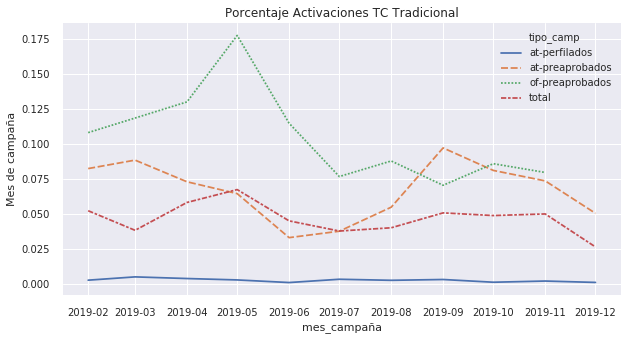

In [94]:
## Gráfico de la tasa express-V3
plt.figure(figsize=(10,5))

ax = sns.lineplot(x="mes_campaña", y="perc_activación", hue="tipo_camp", style='tipo_camp', data=kpis_tot, sort = False)
plt.title('Porcentaje Activaciones TC Tradicional')
plt.ylabel('Número de Activaciones')
plt.ylabel('Mes de campaña')

Text(0, 0.5, 'Mes de campaña')

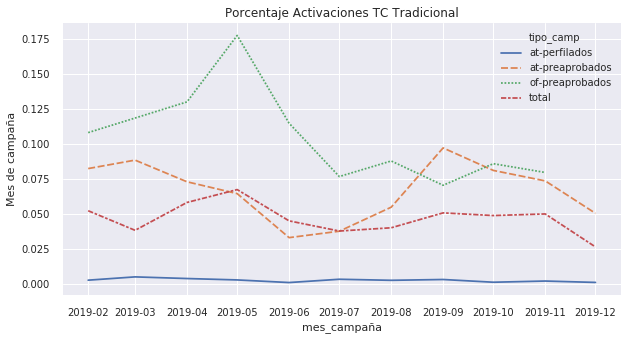

In [95]:
## Gráfico de la tasa express-V3
plt.figure(figsize=(10,5))

ax = sns.lineplot(x="mes_campaña", y="perc_activación", hue="tipo_camp", style='tipo_camp', data=kpis_tot, sort = False)
plt.title('Porcentaje Activaciones TC Tradicional')
plt.ylabel('Número de Activaciones')
plt.ylabel('Mes de campaña')

Text(0, 0.5, 'Mes de campaña')

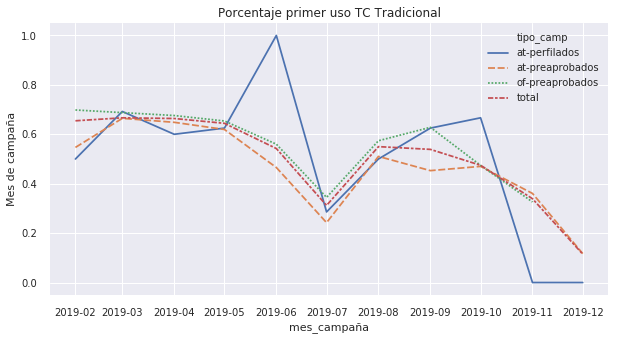

In [96]:
## Gráfico de la tasa express-V3
plt.figure(figsize=(10,5))

ax = sns.lineplot(x="mes_campaña", y="perc_first_use", hue="tipo_camp", style='tipo_camp', data=kpis_tot, sort = False)
plt.title('Porcentaje primer uso TC Tradicional')
plt.ylabel('Número de Activaciones')
plt.ylabel('Mes de campaña')

Text(0, 0.5, 'Mes de campaña')

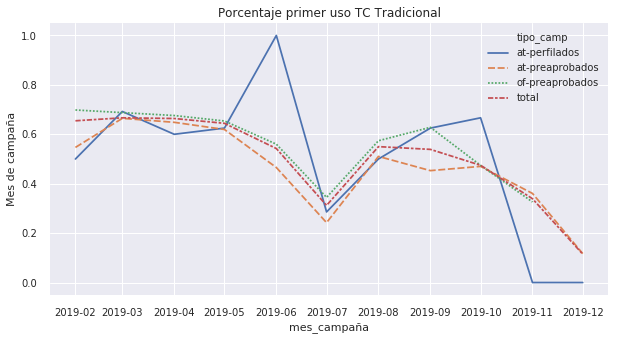

In [97]:
## Gráfico de la tasa express-V3
plt.figure(figsize=(10,5))

ax = sns.lineplot(x="mes_campaña", y="perc_first_use", hue="tipo_camp", style='tipo_camp', data=kpis_tot, sort = False)
plt.title('Porcentaje primer uso TC Tradicional')
plt.ylabel('Número de Activaciones')
plt.ylabel('Mes de campaña')


## Seleccionando base buro

In [23]:
path_file2='s3://adl-refined-dev-popular/campanas/tc-nuevas-proc-vend/campanas-tc-nuevas-proc-vendors_H20190101-20200301.csv'

data2 = pd.read_csv(path_file2, sep = '|', encoding='ISO8859-1',quoting=1, dtype={'ID_CLIENTE':str})
print(data2.shape)
data2.head()

(77743, 6)


,TIP_DOC,NUM_DOC,ID_CLIENTE,CUPO_APROBADO,FECHA,TIPO CAMPAÑA
0,1.0,64543703,779452303196638001,NaN,01/02/2019,Perfilados Activos
1,1.0,1013652262,767952313507880801,NaN,01/02/2019,Perfilados Activos
2,1.0,80188542,699952305504125601,NaN,01/02/2019,Perfilados Activos
3,1.0,1022989795,203652310816127502,NaN,01/02/2019,Perfilados Activos
4,1.0,79407899,379352315012448502,NaN,01/02/2019,Perfilados Activos


In [24]:
data2 = data2.drop_duplicates()

In [25]:
# Casting variables
data2['tipo_camp'] = np.where(data2['TIPO CAMPAÑA'] == 'Preaprobados','at-preaprobados','at-perfilados')
data2['FECHA'] = pd.to_datetime(data2['FECHA'],format='%d/%m/%Y')
data2['mes_campaña'] = pd.to_datetime(data2['FECHA'].dt.strftime('%Y-%m'),format='%Y-%m')

In [33]:
data_fin = data2.loc[(data2['mes_campaña']<'2020-01-01')&(data2['tipo_camp'] == 'at-perfilados'),['TIP_DOC','NUM_DOC','ID_CLIENTE','mes_campaña']]

In [37]:
data_fin = data_fin.rename(columns={'mes_campaña':'FECHA'})
data_fin

,TIP_DOC,NUM_DOC,ID_CLIENTE,FECHA
0,1.0,64543703,779452303196638001,2019-02-01
1,1.0,1013652262,767952313507880801,2019-02-01
2,1.0,80188542,699952305504125601,2019-02-01
3,1.0,1022989795,203652310816127502,2019-02-01
4,1.0,79407899,379352315012448502,2019-02-01
...,...,...,...,...
38341,1.0,20521530,NaN,2019-12-01
38342,1.0,80821466,NaN,2019-12-01
38343,1.0,21208480,NaN,2019-12-01
38344,1.0,52358161,NaN,2019-12-01


In [39]:
data_fin.to_csv('s3://adl-refined-dev-popular/campanas/base_buro2019.csv', sep = '|', index= False, encoding='utf-8')